Epoch 1/10
1877/1877 [==============================] - 11s 6ms/step - loss: 1.3616 - accuracy: 0.8546
Epoch 2/10
1877/1877 [==============================] - 11s 6ms/step - loss: 0.6473 - accuracy: 0.9178
Epoch 3/10
1877/1877 [==============================] - 8s 4ms/step - loss: 0.3559 - accuracy: 0.9384
Epoch 4/10
1877/1877 [==============================] - 7s 4ms/step - loss: 0.3069 - accuracy: 0.9477
Epoch 5/10
1877/1877 [==============================] - 11s 6ms/step - loss: 0.3109 - accuracy: 0.9593
Epoch 6/10
1877/1877 [==============================] - 12s 7ms/step - loss: 0.2355 - accuracy: 0.9665
Epoch 7/10
1877/1877 [==============================] - 12s 7ms/step - loss: 0.1311 - accuracy: 0.9739
Epoch 8/10
1877/1877 [==============================] - 12s 6ms/step - loss: 0.1145 - accuracy: 0.9783
Epoch 9/10
1877/1877 [==============================] - 11s 6ms/step - loss: 0.0906 - accuracy: 0.9823
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 

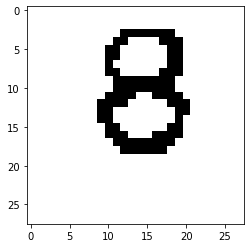

1/1 [==============================] - 0s 35ms/step
label:  five 		prediction:  five


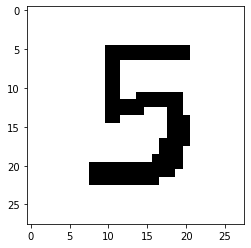

1/1 [==============================] - 0s 37ms/step
label:  four 		prediction:  four


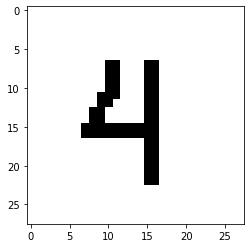

1/1 [==============================] - 0s 40ms/step
label:  nine 		prediction:  four


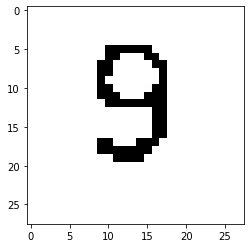

1/1 [==============================] - 0s 27ms/step
label:  one 		prediction:  one


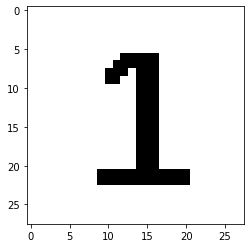

1/1 [==============================] - 0s 35ms/step
label:  seven 		prediction:  seven


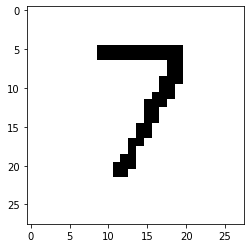

1/1 [==============================] - 0s 25ms/step
label:  six 		prediction:  six


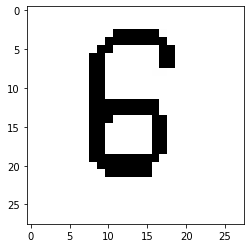

1/1 [==============================] - 0s 34ms/step
label:  three 		prediction:  three


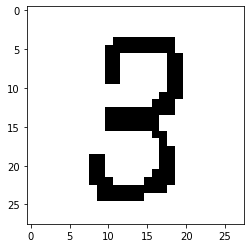

1/1 [==============================] - 0s 24ms/step
label:  two 		prediction:  seven


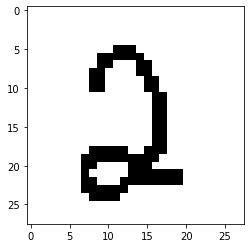

1/1 [==============================] - 0s 21ms/step
label:  two 		prediction:  two


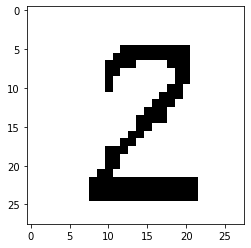

1/1 [==============================] - 0s 26ms/step
label:  zero 		prediction:  nine


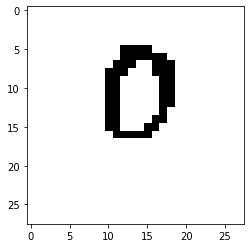

accuracy:  0.6363636363636364


In [10]:
# IMPORTS
import tensorflow as tf # for model
import os # get all the images form folder
import cv2 # get data of images
import matplotlib.pyplot as plt # plooting images from image data
import numpy as np
import re # for regex
# DATA
mnist = tf.keras.datasets.mnist
(Xtrain, ytrain),(Xtest, yTest) = mnist.load_data()

# NORMALIZE DATA-------------------------------------------------------------------------------------
XTrain = tf.keras.utils.normalize(Xtrain, axis=1)
XTest = tf.keras.utils.normalize(Xtest, axis=1)

#  ADD PERSONAL DATA---------------------------------------------------------------------------------
labels, imgData = [], []
mapping = {0:'zero', 1:'one', 2:'two', 3:'three', 4:'four', 
           5:'five', 6:'six', 7:'seven', 8:'eight', 9:'nine'}
keys, values = list(mapping.keys()), list(mapping.values())
for img in os.listdir("TrainImages"):
    # turn the image to data and append in list    
    imgData.append(np.invert(np.array(cv2.imread(f"TrainImages/{img}")[:,:,0])))
    # get label form image name and append     
    labels.append(keys[values.index(re.findall('([a-zA-Z ]*)\d*.*', img)[0])])
# concatonate to training set
XTrain = np.concatenate((XTrain, np.array(imgData)), axis=0)
ytrain  = np.concatenate((ytrain, np.array(labels)), axis=0)

# MODEL-----------------------------------------------------------------------------------------------
model  = tf.keras.models.Sequential()
# add hidden layers
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train
model.fit(XTrain, ytrain, epochs=10) 
# evaluation
loss, accuracy = model.evaluate(XTest, yTest)
print(f"loss: {loss}")
print(f"accuracy: {accuracy}")

# SAVE-----------------------------------------------------------------------------------------------
model.save('digitRecognizer.model')

# LOAD-----------------------------------------------------------------------------------------------
# model=tf.keras.models.load_model("digitRecognizer.model")

# ACCURACY------------------------------------------------------------------------------------------
labels, predictions = [], []
l, a = 0, 0
for img in os.listdir("TestImages"):
    label = re.findall('([a-zA-Z ]*)\d*.*', img)[0]
    imgdata = np.invert(np.array([cv2.imread(f"TestImages/{img}")[:,:,0]]))
    prediction = np.argmax(model.predict(imgdata))
    print("label: ", label, "\t\tprediction: ", mapping[prediction])
    if label==mapping[prediction]:
        a+=1
    plt.imshow(imgdata[0], cmap=plt.cm.binary)
    plt.show()
    l+=1
print("accuracy: ", a/l)